In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
complete = pd.read_csv('complete_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'complete_data.csv'

In [ ]:
complete['ISBN'] = complete['ISBN'].astype(str)


In [ ]:
def transform_isbn(isbn):
    if len(isbn) == 15:
        return isbn[:-2]  # Cut the last two characters
    elif len(isbn) == 10:
        return isbn  # No modification needed for 10-digit ISBN
    else:
        return None

# Apply the function to the 'ISBN' column
complete['ISBN'] = complete['ISBN'].apply(transform_isbn)

In [ ]:
string_length_counts = complete['ISBN'].str.len().value_counts()
complete = complete.dropna(subset=['ISBN'])
# Filtering out rows with invalid ISBNs
filt_complete = complete[complete['ISBN'].str[:-1].str.isnumeric()]


In [ ]:
book_rating_path = 'data/Book_reviews/BX-Book-Ratings.csv'
book_rating = pd.read_csv(book_rating_path, sep=';', quotechar='"', encoding='windows-1252')
book_rating['ISBN'] = book_rating['ISBN'].astype(str)
string_length_counts_2 = book_rating['ISBN'].str.len().value_counts()
print(string_length_counts_2)
book_rating.head()

ISBN
10    1139363
9        5140
11       2150
13       1740
12        700
8         677
14         10
Name: count, dtype: int64


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
preprocessed = pd.read_csv('data/Books Data with Category Language and Summary/Preprocessed_data.csv')
preprocessed['isbn'] = preprocessed['isbn'].astype(str)
preprocessed.rename(columns={'isbn': 'ISBN'}, inplace=True)
string_length_counts_3 = preprocessed['ISBN'].str.len().value_counts()

In [ ]:
complete.head()

,Unnamed: 0,book_id,book_title,author,publication_date,genre,summary,ISBN,Image_URL
0,0,4081,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul...",9780752808628,http://books.google.com/books/content?id=ccl_N...
1,1,4331,Book of Joshua,NaN,NaN,NaN,(Chapter 1 is the first of three important mo...,9781951129422,http://books.google.com/books/content?id=l6izz...
2,2,4381,Book of Ruth,NaN,NaN,NaN,During the time of the Judges when there was ...,9781906012861,http://books.google.com/books/content?id=AzICt...
3,3,4382,Book of Esther,NaN,NaN,NaN,"Ahasuerus, ruler of a massive Persian empire,...",9781567222036,http://books.google.com/books/content?id=UlMGX...
4,4,4386,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",The book of Job tells the story of an extreme...,9780880992985,http://books.google.com/books/content?id=3cZO0...


In [ ]:
def check_digit_13(isbn):
    assert len(isbn) == 12
    sum = 0
    for i in range(len(isbn)):
        c = int(isbn[i])
        if i % 2: w = 3
        else: w = 1
        sum += w * c
    r = 10 - (sum % 10)
    if r == 10: return '0'
    else: return str(r)

def convert_10_to_13(isbn):
    assert len(isbn) == 10
    prefix = '978' + isbn[:-1]
    check = check_digit_13(prefix)
    return prefix + check


Complete changing to all ISBN 13

In [ ]:
def complete_to_13(isbn):
    if len(isbn) == 10:
        return convert_10_to_13(isbn)
    else:
        return isbn

In [ ]:
# Change ISBN from 10 to 13 or keep at 13
filt_complete['isbn_13'] = filt_complete['ISBN'].apply(complete_to_13)

/var/folders/gk/wklnyjmd5mscj9kxvb5nbxbw0000gn/T/ipykernel_91093/482874956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_complete['isbn_13'] = filt_complete['ISBN'].apply(complete_to_13)


In [ ]:
filt_complete.head()

,Unnamed: 0,book_id,book_title,author,publication_date,genre,summary,ISBN,Image_URL,isbn_13
0,0,4081,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul...",9780752808628,http://books.google.com/books/content?id=ccl_N...,9780752808628
1,1,4331,Book of Joshua,NaN,NaN,NaN,(Chapter 1 is the first of three important mo...,9781951129422,http://books.google.com/books/content?id=l6izz...,9781951129422
2,2,4381,Book of Ruth,NaN,NaN,NaN,During the time of the Judges when there was ...,9781906012861,http://books.google.com/books/content?id=AzICt...,9781906012861
3,3,4382,Book of Esther,NaN,NaN,NaN,"Ahasuerus, ruler of a massive Persian empire,...",9781567222036,http://books.google.com/books/content?id=UlMGX...,9781567222036
4,4,4386,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",The book of Job tells the story of an extreme...,9780880992985,http://books.google.com/books/content?id=3cZO0...,9780880992985


In [ ]:
book_rating = book_rating[book_rating['ISBN'].str.len() == 10]

# Filtering out rows with invalid ISBNs
filt_book_rating = book_rating[book_rating['ISBN'].str[:-1].str.isnumeric()]


# Converting from ISBN 10 to ISBN 13
filt_book_rating['isbn_13'] = filt_book_rating['ISBN'].apply(convert_10_to_13)
filt_book_rating.tail()

/var/folders/gk/wklnyjmd5mscj9kxvb5nbxbw0000gn/T/ipykernel_91093/2627854889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_book_rating['isbn_13'] = filt_book_rating['ISBN'].apply(convert_10_to_13)


,User-ID,ISBN,Book-Rating,isbn_13
1149774,276704,0876044011,0,9780876044018
1149775,276704,1563526298,9,9781563526299
1149776,276706,0679447156,0,9780679447153
1149777,276709,0515107662,10,9780515107661
1149778,276721,0590442449,10,9780590442442


In [ ]:
# Filtering out 0 ratings
filt_book_rating = filt_book_rating[filt_book_rating['Book-Rating'] != 0]

# Counting how many times an ISBN has been rated
rating_counts = filt_book_rating.groupby('isbn_13')['Book-Rating'].count().reset_index()
rating_counts.columns = ['isbn_13', 'RatingCount']

# Calculating average ratings
average_ratings = filt_book_rating.groupby('isbn_13')['Book-Rating'].mean().reset_index()

# joining ratings
merged_rating_df = pd.merge(filt_complete, average_ratings, on='isbn_13', how='left')

# joining ratings count
full_merged_df = pd.merge(merged_rating_df, rating_counts, on='isbn_13', how='left')

In [ ]:
non_nan_count = full_merged_df['Book-Rating'].count()
print(non_nan_count)

5115


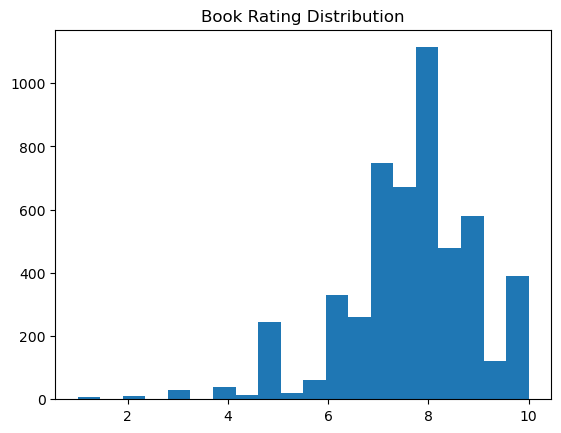

In [ ]:
plt.hist(full_merged_df['Book-Rating'], bins=20)
plt.title('Book Rating Distribution')
plt.show()

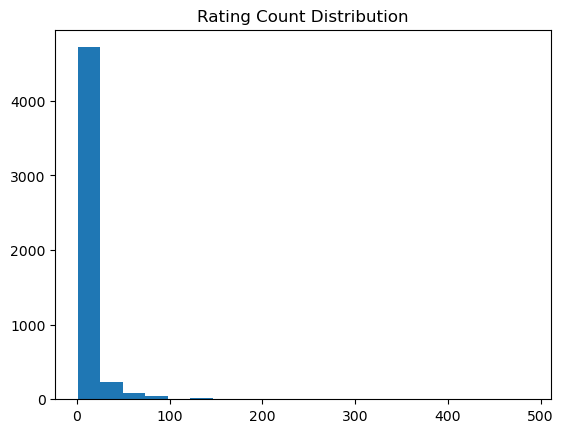

In [ ]:
plt.hist(full_merged_df['RatingCount'], bins=20)
plt.title('Rating Count Distribution')
plt.show()

In [ ]:
non_nan_rating_count = full_merged_df['RatingCount'].count()
print(non_nan_rating_count)

max_rating_count = full_merged_df['RatingCount'].max()
print(max_rating_count)

min_rating_count = full_merged_df['RatingCount'].min()
print(min_rating_count)

max_rating = full_merged_df['Book-Rating'].max()
print(max_rating)

min_rating = full_merged_df['Book-Rating'].min()
print(min_rating)

5115
487.0
1.0
10.0
1.0


Now Trying with Preprocessed Data

In [ ]:
book_rating_pre = preprocessed[preprocessed['ISBN'].str.len() == 10]

# Filtering out rows with invalid ISBNs
filt_book_rating_pre = preprocessed[preprocessed['ISBN'].str[:-1].str.isnumeric()]


# Converting from ISBN 10 to ISBN 13
filt_book_rating_pre['isbn_13'] = filt_book_rating_pre['ISBN'].apply(convert_10_to_13)

/var/folders/gk/wklnyjmd5mscj9kxvb5nbxbw0000gn/T/ipykernel_91093/3416731570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_book_rating_pre['isbn_13'] = filt_book_rating_pre['ISBN'].apply(convert_10_to_13)


In [ ]:
filt_book_rating_pre = filt_book_rating_pre[filt_book_rating_pre['rating'] != 0]

# Counting how many times an ISBN has been rated
rating_counts_pre = filt_book_rating_pre.groupby('isbn_13')['rating'].count().reset_index()
rating_counts_pre.columns = ['isbn_13', 'RatingCountPreprocessed']

# Calculating average ratings
average_ratings_pre = filt_book_rating_pre.groupby('isbn_13')['rating'].mean().reset_index()

# joining ratings
merged_rating_pre_df = pd.merge(filt_complete, average_ratings_pre, on='isbn_13', how='left')

# joining ratings count
full_merged_with_pre_df = pd.merge(merged_rating_pre_df, rating_counts_pre, on='isbn_13', how='left')
full_merged_with_pre_df.tail()

,Unnamed: 0,book_id,book_title,author,publication_date,genre,summary,ISBN,Image_URL,isbn_13,rating,RatingCountPreprocessed
13634,13644,36126792,Gates of Paradise,V. C. Andrews,1989-06,"{""/m/039vk"": ""Gothic fiction"", ""/m/03mfnf"": ""Y...","A novel about Annie Stonewall, the daughter o...",0671670646,http://images.amazon.com/images/P/0671670646.0...,9780671670641,7.545455,11.0
13635,13645,36240322,Shelter,Harlan Coben,2011-09-15,NaN,"After Mickey Bolitar moves in with his uncle,...",0385313896,http://images.amazon.com/images/P/0385313896.0...,9780385313896,5.000000,1.0
13636,13646,36534061,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...,0345428056,http://images.amazon.com/images/P/0345428056.0...,9780345428059,NaN,NaN
13637,13647,36665207,The Simpsons: A Complete Guide to Our Favorite...,Matt Groening,1997-11-12,NaN,"{| class=""wikitable"" |- !Seasons covered !Boo...",0060952520,http://images.amazon.com/images/P/0060952520.0...,9780060952525,8.571429,7.0
13638,13648,37054020,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...,0671023209,http://images.amazon.com/images/P/0671023209.0...,9780671023201,8.142857,14.0


In [ ]:
non_nan_rating_count = full_merged_with_pre_df['RatingCountPreprocessed'].count()
print(non_nan_rating_count)

max_rating_count = full_merged_with_pre_df['RatingCountPreprocessed'].max()
print(max_rating_count)

min_rating_count = full_merged_with_pre_df['RatingCountPreprocessed'].min()
print(min_rating_count)

max_rating = full_merged_with_pre_df['rating'].max()
print(max_rating)

min_rating = full_merged_with_pre_df['rating'].min()
print(min_rating)

5094
487.0
1.0
10.0
1.0


In [ ]:
full_merged_df.to_csv('complete_w_ratings.csv')
full_merged_with_pre_df.to_csv('complete_preprocessed_w_ratings.csv')

In [ ]:
embedded.head()

,Unnamed: 0.1,Unnamed: 0,book_id,book_title,author,publication_date,genre,summary,ISBN,Image_URL,embeddings
0,0,0,4081,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul...",9780752808628.0,http://books.google.com/books/content?id=ccl_N...,"[0.007283373270183802, -0.01425887644290924, -..."
1,1,1,4331,Book of Joshua,NaN,NaN,NaN,(Chapter 1 is the first of three important mo...,9781951129422.0,http://books.google.com/books/content?id=l6izz...,"[0.03583015128970146, -0.002895727986469865, -..."
2,2,2,4381,Book of Ruth,NaN,NaN,NaN,During the time of the Judges when there was ...,9781906012861.0,http://books.google.com/books/content?id=AzICt...,"[0.030075039714574814, -0.02325625717639923, -..."
3,4,4,4386,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",The book of Job tells the story of an extreme...,9780880992985.0,http://books.google.com/books/content?id=3cZO0...,"[0.025023845955729485, -0.0145839499309659, -0..."
4,6,6,4451,Book of Jonah,NaN,NaN,NaN,The plot centers on a conflict between Jonah ...,9781609575762.0,http://books.google.com/books/content?id=jfN2Z...,"[0.006332987453788519, -0.009240446612238884, ..."


In [ ]:
embedded = pd.read_csv('attempt_1/data_with_embeddings.csv')

updated_embeddings = pd.merge(embedded,full_merged_df, how='inner', on='ISBN')
#updated_embeddings= updated_embeddings.loc[:,~updated_embeddings.columns.duplicated()]
columns_to_drop = [col for col in updated_embeddings.columns if col.endswith('_y')]
updated_embeddings = updated_embeddings.drop(columns=columns_to_drop)
# Remove "_x" from column names
updated_embeddings.columns = updated_embeddings.columns.str.replace('_x', '')
updated_embeddings.head()

,Unnamed: 0.1,Unnamed: 0,book_id,book_title,author,publication_date,genre,summary,ISBN,Image_URL,embeddings,isbn_13,Book-Rating,RatingCount
0,7297,7297,6020,Crash,J. G. Ballard,1973,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",The story is told through the eyes of narrato...,0679885501,http://images.amazon.com/images/P/0679885501.0...,"[0.018069274723529816, -0.022494850680232048, ...",9780679885504,8.000000,1.0
1,7298,7298,6628,Children of Dune,Frank Herbert,1976,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Nine years after Emperor Paul Muad'dib walked...,0425054721,http://images.amazon.com/images/P/0425054721.0...,"[0.016632236540317535, -0.008448656648397446, ...",9780425054727,10.000000,1.0
2,7300,7300,7817,The Cider House Rules,John Irving,1985,"{""/m/02xlf"": ""Fiction""}",Homer Wells grows up in an orphanage where he...,0553258001,http://images.amazon.com/images/P/0553258001.0...,"[0.02340869791805744, -0.019871216267347336, -...",9780553258004,8.236842,38.0
3,7308,7308,12253,Gaudy Night,Dorothy L. Sayers,1935,"{""/m/02n4kr"": ""Mystery"", ""/m/028v3"": ""Detectiv...",Harriet Vane returns reluctantly to Oxford to...,0060808241,http://images.amazon.com/images/P/0060808241.0...,"[0.02622966840863228, -0.00666824821382761, -0...",9780060808242,7.000000,1.0
4,7309,7309,12667,Genesis,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",God creates the world in six days and consecr...,0812580281,http://images.amazon.com/images/P/0812580281.0...,"[0.02822660654783249, -0.009786345064640045, -...",9780812580280,6.000000,3.0


In [ ]:
updated_embeddings.to_csv('data_w_embeddings_updated.csv')